In [1]:
#import important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualization
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve #metrics
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score #metrics

from sklearn.ensemble import RandomForestClassifier #ML model
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression #ML model
from sklearn.tree import DecisionTreeClassifier #ML model
from matplotlib.pyplot import figure

import pickle

import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [2]:
data= pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
data.drop(["id"], axis=1, inplace=True)

In [4]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data["bmi"].fillna(data["bmi"].median(), inplace=True)

In [6]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Label Encoding

In [9]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

data['gender']= label_encoder.fit_transform(data['gender']) 
data['gender'].unique()

array([1, 0, 2])

In [10]:
data['ever_married']= label_encoder.fit_transform(data['ever_married'])
data['ever_married'].unique()

array([1, 0])

In [11]:
data['work_type']= label_encoder.fit_transform(data['work_type']) 
data['work_type'].unique()

array([2, 3, 0, 4, 1])

In [12]:
data['Residence_type']= label_encoder.fit_transform(data['Residence_type'])
data['Residence_type'].unique()

array([1, 0])

In [13]:
data['smoking_status']= label_encoder.fit_transform(data['smoking_status']) 
data['smoking_status'].unique()

array([1, 2, 3, 0])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


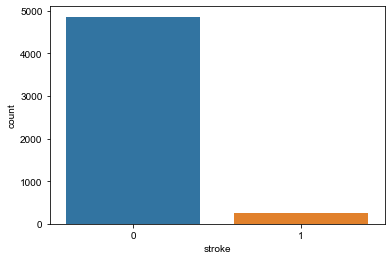

In [15]:
#The distribution of number of Strokes in the dataset

sns.countplot(data=data,x='stroke')
sns.set(rc={'figure.figsize':(7,5)})
plt.show()

### Undersampling

In [16]:
strokes = len(data[data['stroke'] == 1])
no_strokes = data[data.stroke == 0].index
random_indices = np.random.choice(no_strokes,strokes, replace=False)
stroke_indices = data[data.stroke == 1].index
under_sample_indices = np.concatenate([stroke_indices,random_indices])
udata = data.loc[under_sample_indices]

In [17]:
udata

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1088,0,30.0,0,0,0,2,0,93.88,24.0,1,0
1382,0,68.0,0,0,1,2,1,237.21,26.6,3,0
565,0,64.0,1,0,1,2,0,88.53,24.6,2,0
4259,0,46.0,1,0,1,2,0,81.58,36.2,2,0


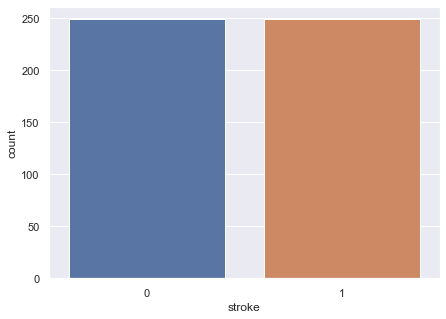

In [18]:
sns.countplot(data=udata,x='stroke')
sns.set(rc={'figure.figsize':(7,5)})
plt.show()

In [19]:
udata.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,28.1,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


In [20]:
#Dividing the dataset into independent and dependent features by locations
X = udata.iloc[:, :-1]
Y = udata.iloc[:, -1]

In [21]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...
1088,0,30.0,0,0,0,2,0,93.88,24.0,1
1382,0,68.0,0,0,1,2,1,237.21,26.6,3
565,0,64.0,1,0,1,2,0,88.53,24.6,2
4259,0,46.0,1,0,1,2,0,81.58,36.2,2


In [22]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1088    0
1382    0
565     0
4259    0
3450    0
Name: stroke, Length: 498, dtype: int64

# EDA

### Categorical Data Analysis

<AxesSubplot:xlabel='stroke', ylabel='count'>

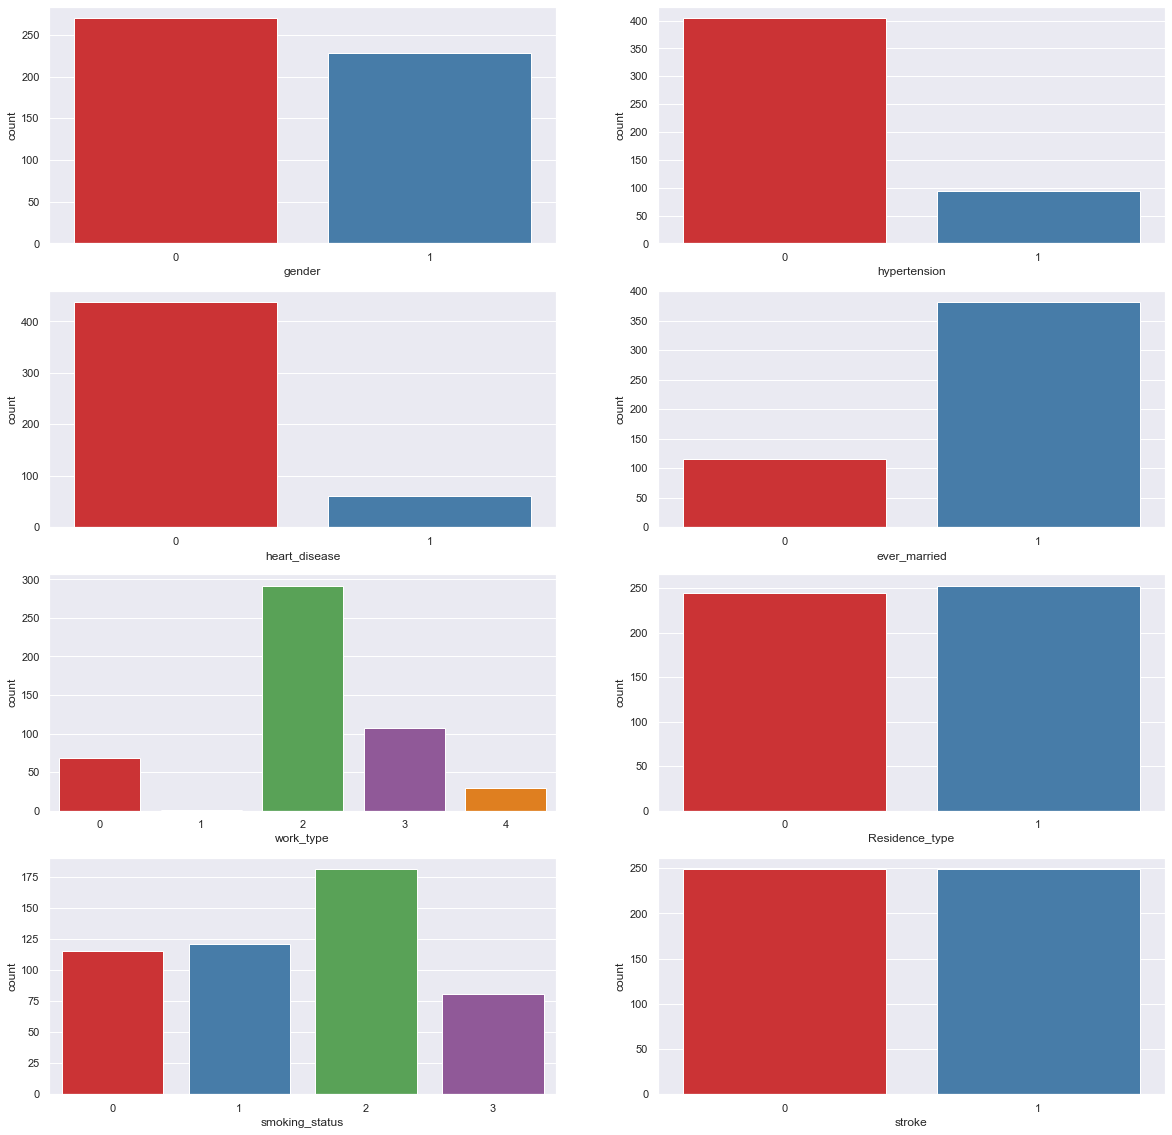

In [23]:
plt.figure(figsize = (20,20))

plt.subplot(4,2,1)
sns.countplot(x = 'gender', palette='Set1', data = udata)

plt.subplot(4,2,2)
sns.countplot(x = 'hypertension', palette='Set1', data = udata)

plt.subplot(4,2,3)
sns.countplot(x = 'heart_disease', palette='Set1', data = udata)

plt.subplot(4,2,4)
sns.countplot(x = 'ever_married', palette='Set1', data = udata)

plt.subplot(4,2,5)
sns.countplot(x = 'work_type', palette='Set1', data = udata)

plt.subplot(4,2,6)
sns.countplot(x = 'Residence_type', palette='Set1', data = udata)

plt.subplot(4,2,7)
sns.countplot(x = 'smoking_status', palette='Set1', data = udata)

plt.subplot(4,2,8)
sns.countplot(x = 'stroke', palette='Set1', data = udata)

### Bivariate Analysis

<AxesSubplot:xlabel='stroke', ylabel='count'>

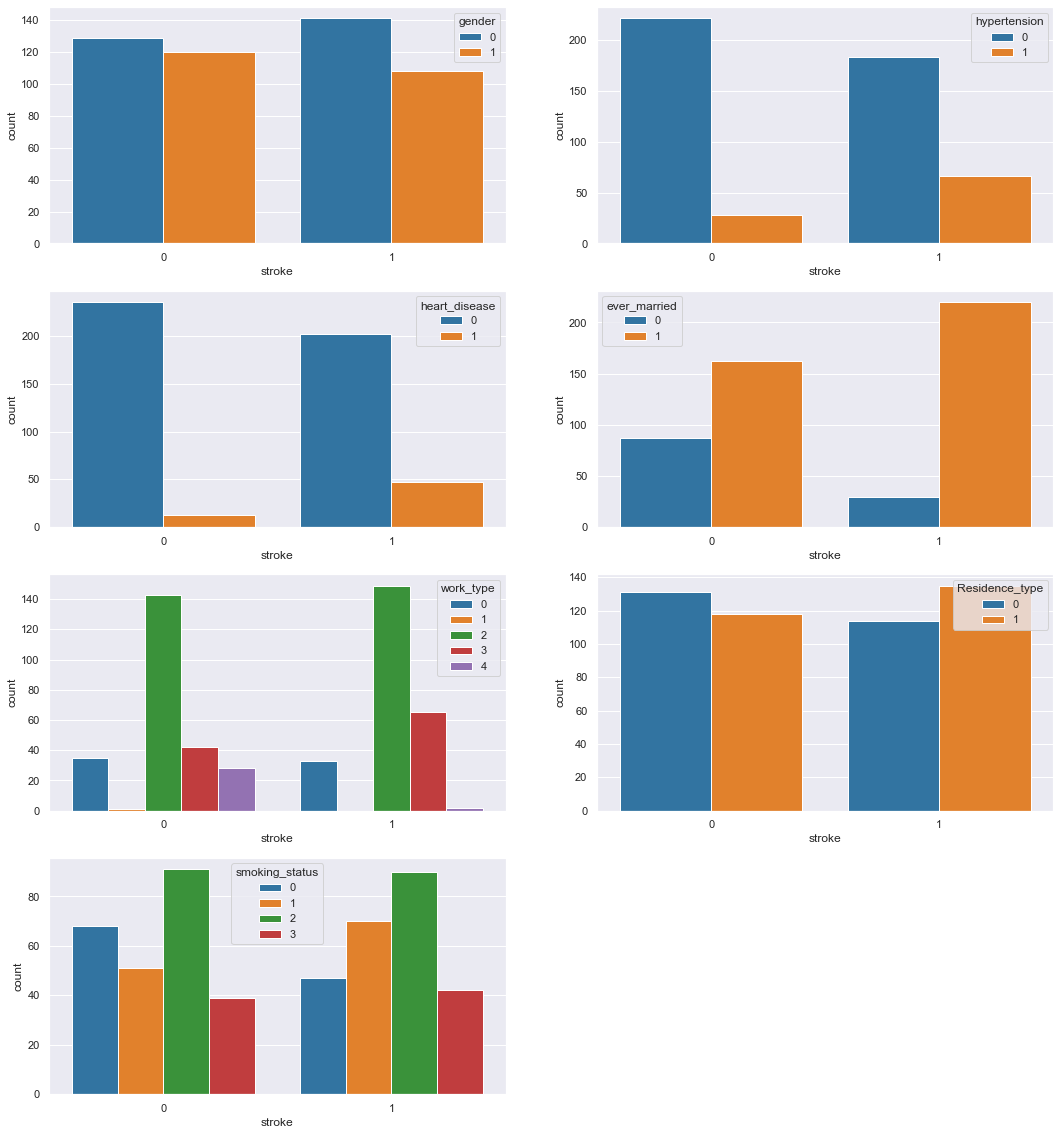

In [24]:
plt.figure(figsize = (18,20))

plt.subplot(4,2,1)
sns.countplot(x = 'stroke', hue= 'gender', palette='tab10', data = udata)

plt.subplot(4,2,2)
sns.countplot(x = 'stroke', hue= 'hypertension', palette='tab10', data = udata)

plt.subplot(4,2,3)
sns.countplot(x = 'stroke', hue= 'heart_disease', palette='tab10', data = udata)

plt.subplot(4,2,4)
sns.countplot(x = 'stroke', hue= 'ever_married', palette='tab10', data = udata)

plt.subplot(4,2,5)
sns.countplot(x = 'stroke', hue= 'work_type', palette='tab10', data = udata)

plt.subplot(4,2,6)
sns.countplot(x = 'stroke', hue= 'Residence_type', palette='tab10', data = udata)

plt.subplot(4,2,7)
sns.countplot(x = 'stroke', hue= 'smoking_status', palette='tab10', data = udata)

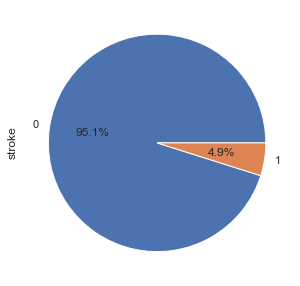

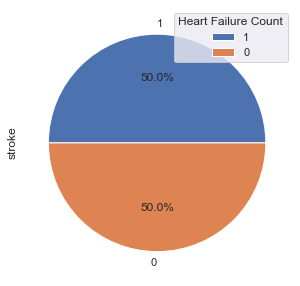

In [25]:
plt.figure(1,figsize=(5,5))
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%')
plt.figure(2,figsize=(5,5))
udata['stroke'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(title="Heart Failure Count")
plt.show()

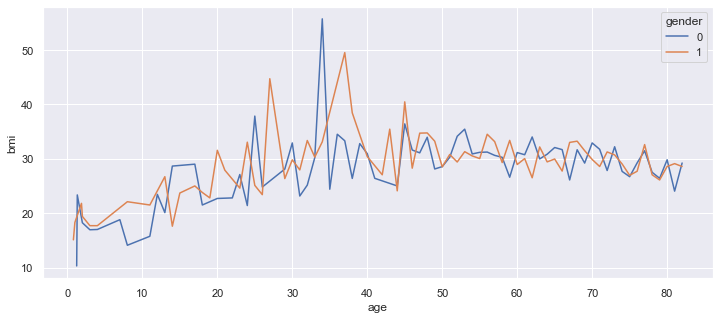

In [26]:
plt.figure(figsize=(12,5))
sns.lineplot(data=udata, x="age", y="bmi", hue='gender', ci=None);

When we look at our age variable, we can see that only from 40 years old people start to have Stroke, and cases below that age are very rare, the trend is that the older the person, the more likely he is to have a stroke.

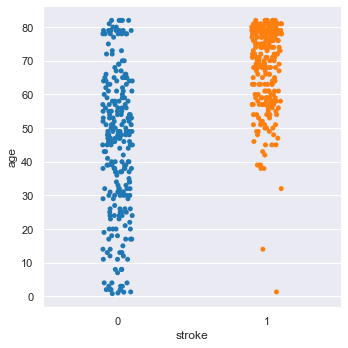

In [27]:
sns.catplot(x = "stroke", y = "age", palette = "tab10", data = udata)

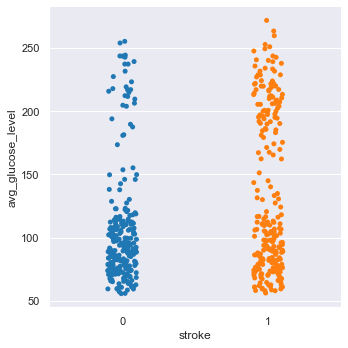

In [28]:
sns.catplot(x = "stroke", y = "avg_glucose_level", palette = "tab10", data = udata)

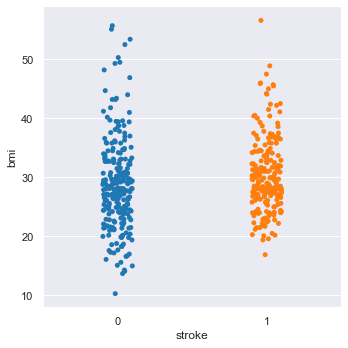

In [29]:
sns.catplot(x = "stroke", y = "bmi", palette = "tab10", data = udata)

Text(0, 0.5, 'Count of Patient')

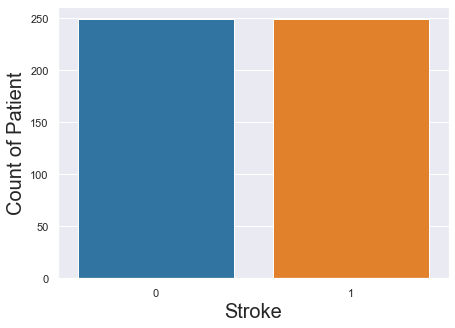

In [30]:
sns.set(rc={'figure.figsize':(7,5)})
seaborn_plot = sns.countplot(udata['stroke'], palette="tab10")
seaborn_plot.set_xlabel("Stroke",fontsize=20)
seaborn_plot.set_ylabel("Count of Patient",fontsize=20)

# There are 2 outcomes in this dataset: 0 and 1 for the likely hood of getting a stroke.
# This is an imbalanced dataset since the number of patients that are likely to get a stroke is smaller when compared with the number of patients that did not.

1    382
0    116
Name: ever_married, dtype: int64


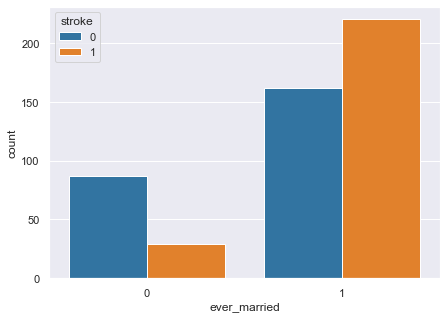

In [31]:
print(udata['ever_married'].value_counts())
sns.countplot(udata['ever_married'],hue = udata['stroke'], palette="tab10")
sns.set(rc={'figure.figsize':(7,5)})

# Most of the patients are married in the given dataset.
# The marital status by itself is not a significant factor in predicting the likely hood of a stroke.

0    270
1    228
Name: gender, dtype: int64


Text(0, 0.5, 'Count of Patient')

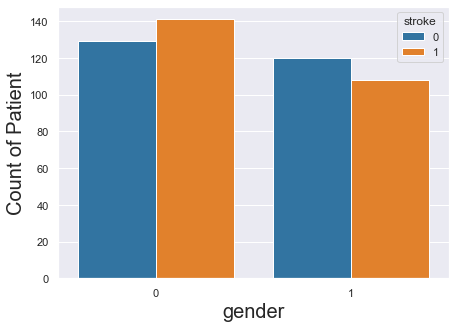

In [32]:
print(udata['gender'].value_counts())
sns.set(rc={'figure.figsize':(7,5)})
seaborn_plot = sns.countplot(udata['gender'], hue = udata['stroke'], palette="tab10")
seaborn_plot.set_xlabel("gender",fontsize=20)
seaborn_plot.set_ylabel("Count of Patient",fontsize=20)
# 0-male
# 1-female

0    438
1     60
Name: heart_disease, dtype: int64


Text(0, 0.5, 'Count of Patient')

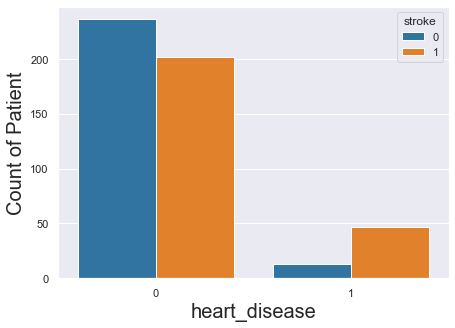

In [33]:
print(udata['heart_disease'].value_counts())
sns.set(rc={'figure.figsize':(7,5)})
seaborn_plot = sns.countplot(udata['heart_disease'], hue = udata['stroke'], palette="tab10")
seaborn_plot.set_xlabel("heart_disease",fontsize=20)
seaborn_plot.set_ylabel("Count of Patient",fontsize=20)

# The number of female gender patients is more than the number of male gender patients for both cases.
# The Gender variable by itself is not enough to predict the likely hood of getting a stroke.
# 0 - female
# 1 - male

1    253
0    245
Name: Residence_type, dtype: int64


Text(0, 0.5, 'Count of Patient')

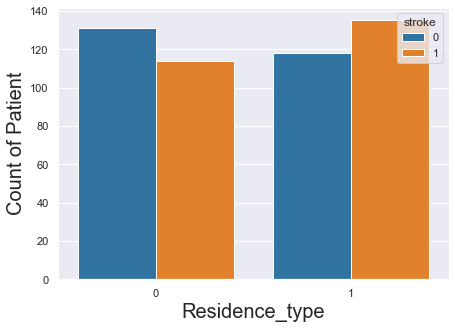

In [34]:
print(udata['Residence_type'].value_counts())
sns.set(rc={'figure.figsize':(7,5)})
seaborn_plot = sns.countplot(udata['Residence_type'], hue = udata['stroke'], palette="tab10")
seaborn_plot.set_xlabel("Residence_type",fontsize=20)
seaborn_plot.set_ylabel("Count of Patient",fontsize=20)

# A Comparable number of patients live in Urban and Rural regions.
# The Residence_type column will also be not good enough by itself.
# 0 - Rural
# 1 - Urban

2    181
1    121
0    115
3     81
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

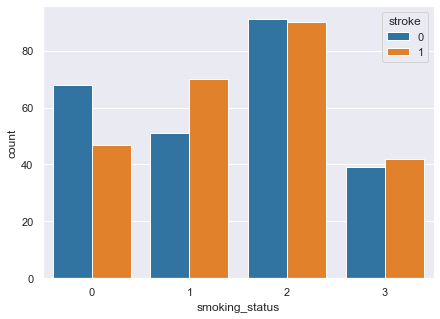

In [35]:
print(udata['smoking_status'].value_counts())
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(udata['smoking_status'], hue = udata['stroke'], palette="tab10")

# smoking_status is also not a good indicator by itself of whether the patient is likely to get a stroke.
# 0 - 
# 1 -
# 2 -
# 3 -

0    404
1     94
Name: hypertension, dtype: int64


Text(0, 0.5, 'Count of Patient')

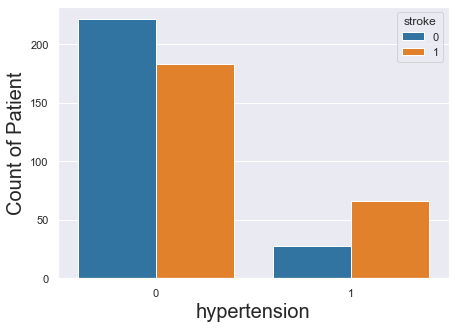

In [36]:
print(udata['hypertension'].value_counts())
sns.set(rc={'figure.figsize':(7,5)})
seaborn_plot = sns.countplot(udata['hypertension'], hue = udata['stroke'], palette="tab10")
seaborn_plot.set_xlabel("hypertension",fontsize=20)
seaborn_plot.set_ylabel("Count of Patient",fontsize=20)

# Hypertension is also by itself not a good enough variable.

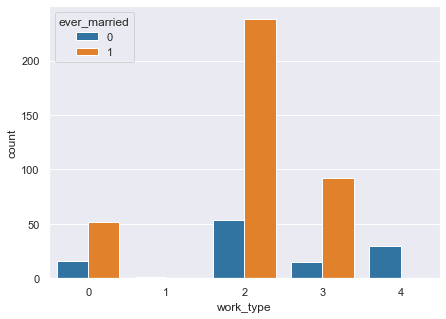

In [37]:
sns.countplot(x='work_type', hue='ever_married', data=udata, palette="tab10");
# 0 -
# 1 -
# 2 -
# 3 -
# 4 -

<AxesSubplot:xlabel='bmi', ylabel='Count'>

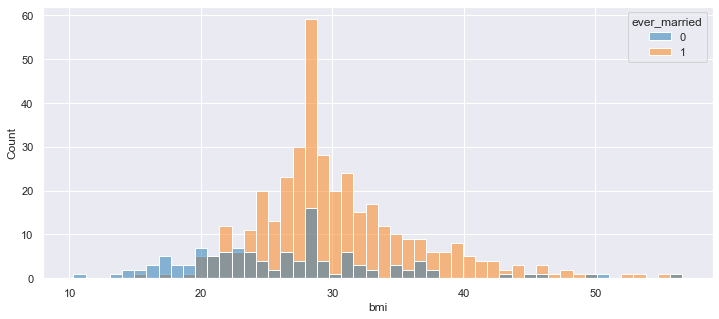

In [38]:
plt.figure(figsize=(12,5))
sns.histplot(x='bmi', hue='ever_married', data=udata, bins=50, palette="tab10")

# married people have higher bmi

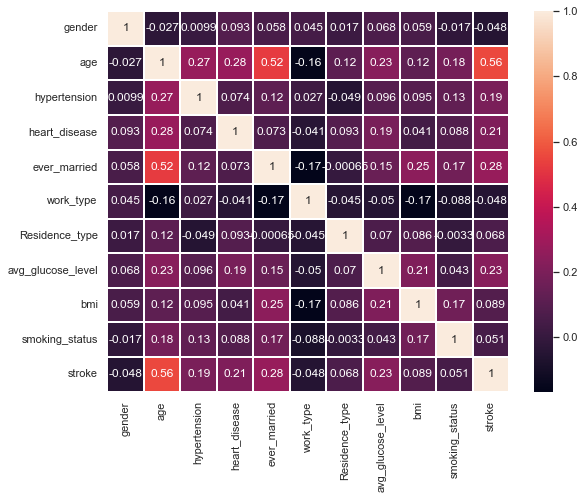

In [39]:
plt.figure(figsize=(9,7))
sns.heatmap(udata.corr(),annot=True,linewidth =2)
plt.show()

# There is some positive correlation between age and bmi.
# Overall, all 3 variables are correlated positively with each other. 
# However, age and bmi show a stronger correlation.

In [40]:
def analysis_plots(udata, variable,target):

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(udata[variable], bins=30,color = 'r', palette="tab10")
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(udata[variable],udata[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=udata[variable],color = 'b', palette="Set1")
    plt.title('Boxplot')

   # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = udata, palette="Set2")   
    plt.title('Barplot')

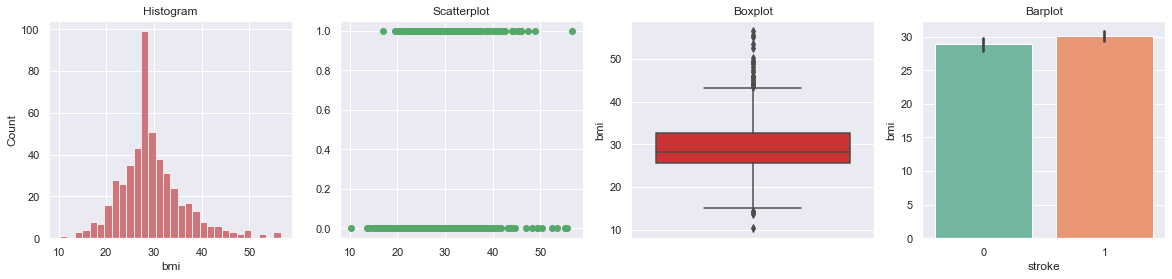

In [41]:
analysis_plots(udata,'bmi','stroke')

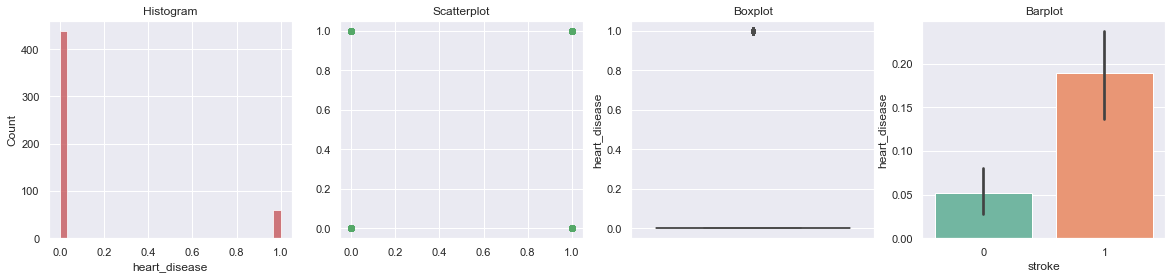

In [42]:
analysis_plots(udata,'heart_disease','stroke')

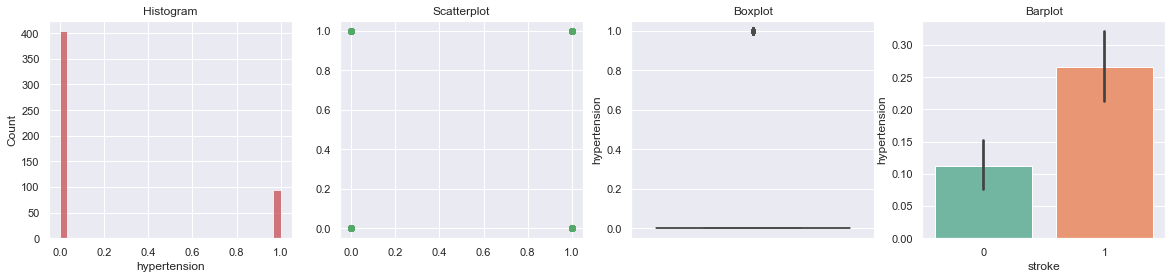

In [43]:
analysis_plots(udata,'hypertension','stroke')

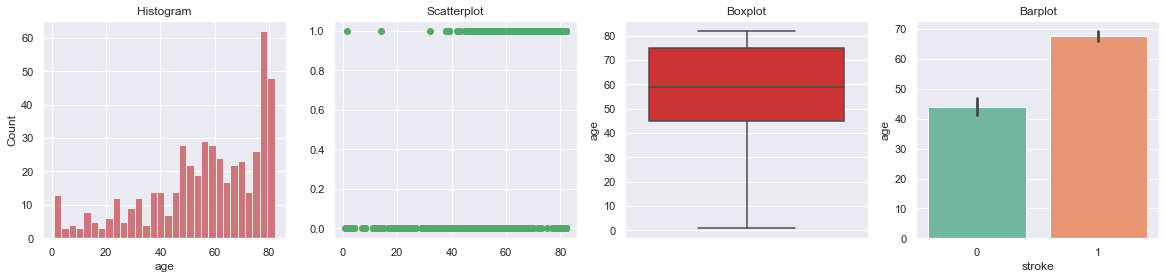

In [44]:
analysis_plots(udata,'age','stroke')

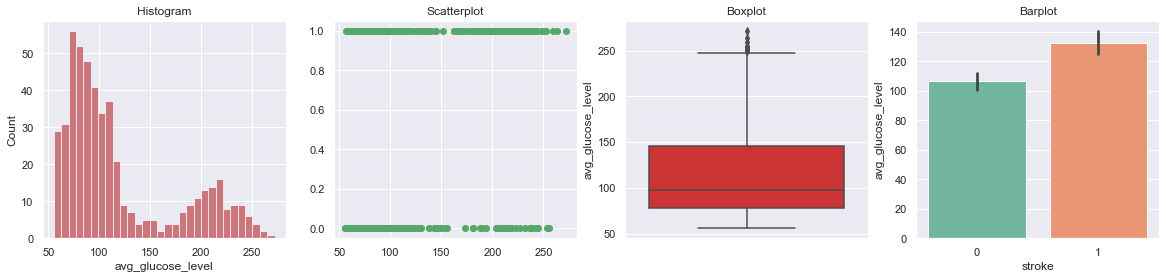

In [45]:
analysis_plots(udata,'avg_glucose_level','stroke')

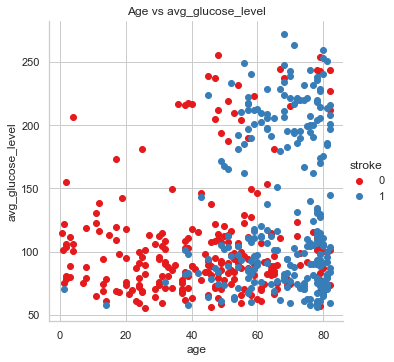

In [46]:
sns.set_style("whitegrid")
sns.FacetGrid(udata, hue="stroke", height=5, palette="Set1").map(plt.scatter, "age", "avg_glucose_level").add_legend()
plt.title('Age vs avg_glucose_level')
plt.show()

# Having more age increases the likely hood of getting a stroke.
# We can see that almost all the yellow spots are after 40. However, it is worth noting that a lot of the blue spots are also present after 40.
# The age variable will be useful when creating a model.

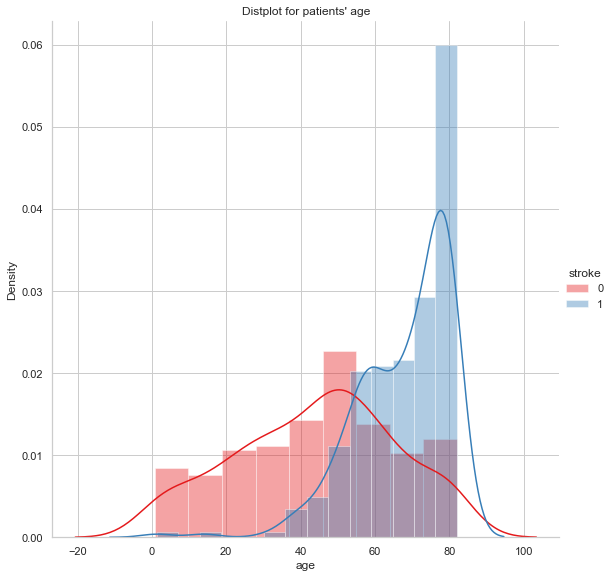

In [47]:
sns.FacetGrid(udata, hue="stroke", height = 8, palette="Set1").map(sns.distplot, "age").add_legend()
plt.title("Distplot for patients' age")
plt.show()

# Generally, higher age increases the likely hood of a stroke.

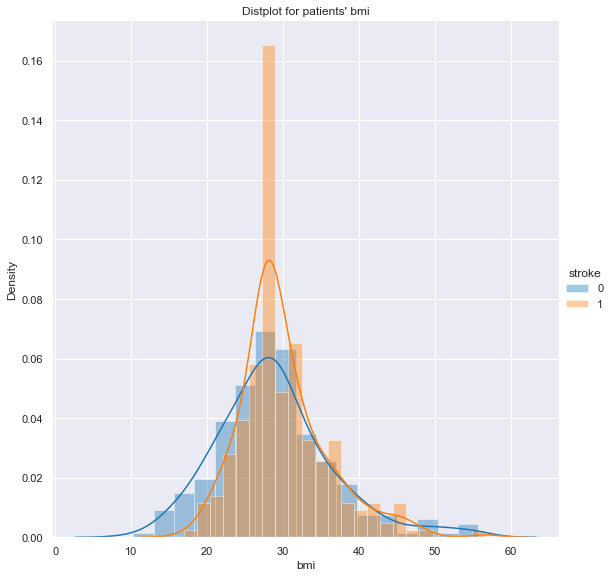

In [48]:
sns.set(rc={'figure.figsize':(7,5)})
sns.FacetGrid(udata, hue="stroke", height = 8, palette="tab10").map(sns.distplot, "bmi").add_legend()
plt.title("Distplot for patients' bmi")
plt.show()

# The bmi column by itself cannot be used to predict the likely hood of a stroke.

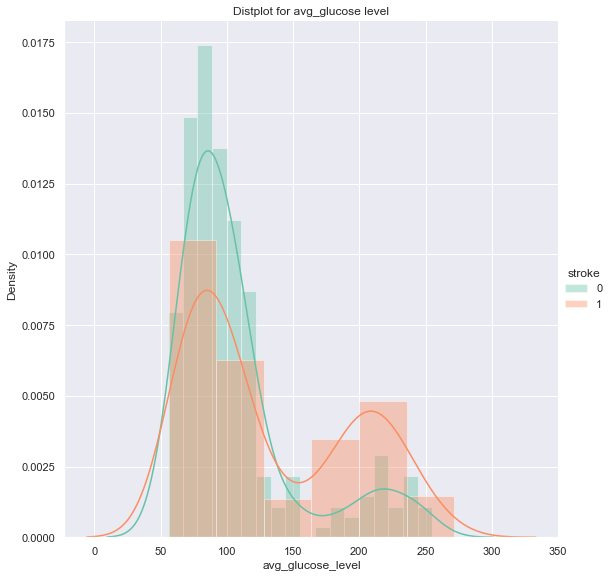

In [49]:
sns.set(rc={'figure.figsize':(7,5)})
sns.FacetGrid(udata, hue="stroke", height = 8, palette="Set2").map(sns.distplot, "avg_glucose_level").add_legend()
plt.title("Distplot for avg_glucose level")
plt.show()

# The avg_glucose_level column by itself cannot be used to predict the likely hood of a stroke.

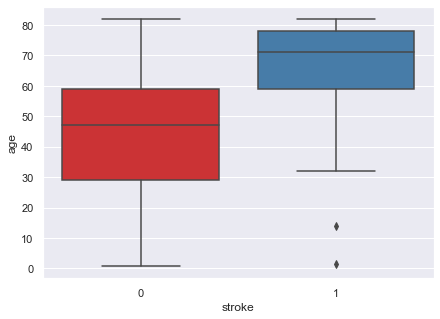

In [50]:
# STROKE VS AGE

sns.set(rc={'figure.figsize':(7,5)})
sns.boxplot(x='stroke',y='age', data=udata, palette='Set1')
seaborn_plot.set_xlabel("stroke",fontsize=20)
seaborn_plot.set_ylabel("age",fontsize=20)
plt.show()

# The 75th Percentile of patients who did not suffer from stroke is equivalent to the 25th percentile of patients who suffered from a stroke.
# The 50th percentile and 75th percentile for the patients that are likely to get a stroke shares a smaller gap when compared with the 25th percentile and 50th percentile.

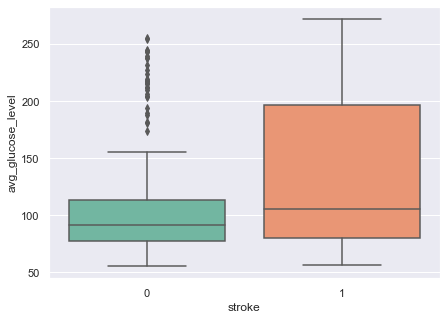

In [51]:
# STROKE VS AVG GLUCOSE LEVEL

sns.set(rc={'figure.figsize':(7,5)})
sns.boxplot(x='stroke',y='avg_glucose_level', data=udata, palette='Set2')
seaborn_plot.set_xlabel("stroke",fontsize=20)
seaborn_plot.set_ylabel("Avg Glucose Level",fontsize=20)
plt.show()

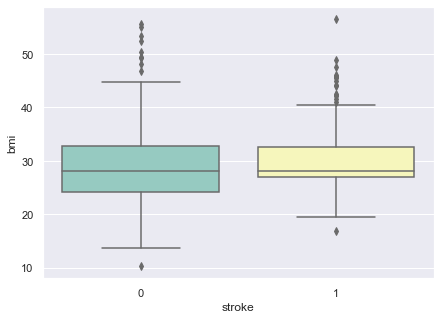

In [52]:
# STROKE VS BMI

sns.set(rc={'figure.figsize':(7,5)})
sns.boxplot(x='stroke',y='bmi', data=udata, palette='Set3')
seaborn_plot.set_xlabel("stroke",fontsize=20)
seaborn_plot.set_ylabel("BMI",fontsize=20)
plt.show()

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

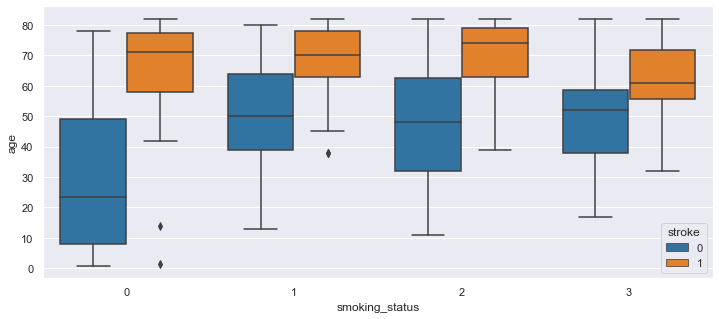

In [53]:
plt.figure(figsize=(12,5))
sns.boxplot(y='age', x='smoking_status',hue='stroke' ,data=udata, palette="tab10")

<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

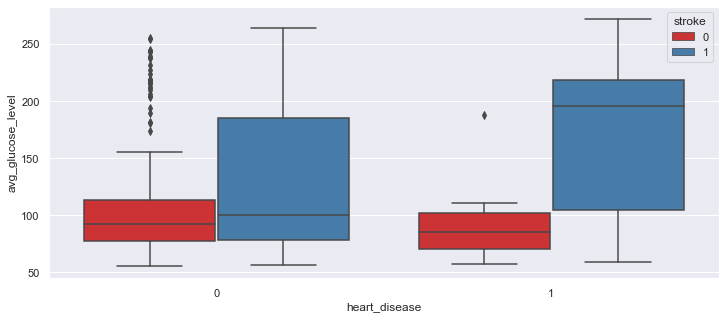

In [54]:
plt.figure(figsize=(12,5))
sns.boxplot(y='avg_glucose_level', x='heart_disease',hue='stroke' ,data=udata, palette="Set1")

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

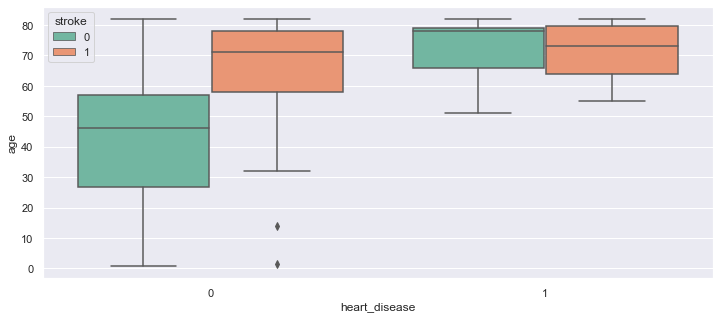

In [55]:
plt.figure(figsize=(12,5))
sns.boxplot(y='age', x='heart_disease',hue='stroke' ,data=udata, palette="Set2")

## Handling outliers

In [56]:
def count_outliers(df, features):
    df2 = udata.drop(udata[(udata[features]==0)].index)
    # 1st quartile
    Q1 = df2[features].quantile(0.25)

    # 3rd quartile
    Q3 = df2[features].quantile(0.75)

    IQR = Q3-Q1
    LowerTail = Q1-1.5*IQR
    UpperTail = Q3+1.5*IQR
  
    outlier_arr = df2[(df2[features]>=UpperTail) | (df2[features]<=LowerTail)]
    return pd.DataFrame(outlier_arr)

In [57]:
bmi_outliers = count_outliers(udata,'bmi')
bmi_outliers.value_counts(bmi_outliers['bmi'])

bmi
10.3    1
13.7    1
55.7    1
55.1    1
53.4    1
52.5    1
50.3    1
49.5    1
49.3    1
48.9    1
48.2    1
47.5    1
46.9    1
46.0    1
45.9    1
45.7    1
45.5    1
45.0    1
44.7    1
44.2    1
44.1    1
44.0    1
43.4    1
14.3    1
14.1    1
56.6    1
dtype: int64

In [58]:
Residence_type_outliers = count_outliers(udata,'Residence_type')
Residence_type_outliers.value_counts(Residence_type_outliers['Residence_type'])

Residence_type
1    253
dtype: int64

In [59]:
avg_glucose_level_outliers = count_outliers(udata,'avg_glucose_level')
avg_glucose_level_outliers.value_counts(avg_glucose_level_outliers['avg_glucose_level'])

avg_glucose_level
249.31    1
250.89    1
252.72    1
253.86    1
255.17    1
259.63    1
263.32    1
271.74    1
dtype: int64

In [60]:
work_type_outliers = count_outliers(udata,'work_type')
work_type_outliers.value_counts(work_type_outliers['work_type'])

Series([], dtype: int64)

In [61]:
ever_married_outliers = count_outliers(udata,'ever_married')
ever_married_outliers.value_counts(ever_married_outliers['ever_married'])

ever_married
1    382
dtype: int64

In [62]:
heart_disease_outliers = count_outliers(udata,'heart_disease')
heart_disease_outliers.value_counts(heart_disease_outliers['heart_disease'])

heart_disease
1    60
dtype: int64

In [63]:
work_type_outliers = count_outliers(udata,'work_type')
work_type_outliers.value_counts(work_type_outliers['work_type'])

Series([], dtype: int64)

# Splitting the data for training and testing

In [64]:
from sklearn.model_selection import train_test_split #split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=100)

In [65]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
221,1,79.0,0,0,1,2,0,72.73,28.4,2
19,1,57.0,0,1,0,0,1,217.08,28.1,0
31,1,42.0,0,0,1,2,0,83.41,25.4,0
227,1,74.0,0,0,1,3,0,60.98,28.1,2
28,1,69.0,0,1,1,3,1,195.23,28.3,3
...,...,...,...,...,...,...,...,...,...,...
4076,0,49.0,0,0,1,2,1,72.18,30.8,0
2751,0,48.0,0,0,1,0,0,255.17,38.1,1
3987,0,51.0,0,0,1,0,1,90.67,37.8,0
4798,1,17.0,0,0,0,2,0,119.58,25.0,2


In [66]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
103,0,81.0,0,1,1,3,0,78.70,19.4,0
136,1,76.0,0,0,1,2,1,140.10,29.9,1
140,1,82.0,0,1,1,0,0,103.68,25.0,2
4857,1,32.0,0,0,1,2,0,102.13,32.3,2
965,1,40.0,0,0,0,2,1,88.27,28.1,1
...,...,...,...,...,...,...,...,...,...,...
50,0,76.0,0,0,0,2,1,89.96,28.1,0
78,0,51.0,0,0,1,2,1,165.31,28.1,2
1886,0,31.0,0,0,0,2,0,59.63,19.9,2
2856,1,14.0,0,0,0,2,0,61.04,17.6,0


In [67]:
Y_train

221     1
19      1
31      1
227     1
28      1
       ..
4076    0
2751    0
3987    0
4798    0
8       1
Name: stroke, Length: 373, dtype: int64

In [68]:
Y_test

103     1
136     1
140     1
4857    0
965     0
       ..
50      1
78      1
1886    0
2856    0
3114    0
Name: stroke, Length: 125, dtype: int64

# MACHINE LEARNING MODELS

# Logistic Regression

In [69]:
#Training the Logistic regression model on the Training set
#importing library
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#fitting the x and y values
lr.fit(X_train,Y_train)

LogisticRegression()

In [70]:
#prediction
Y_pred = lr.predict(X_test)
features = np.array([[0,78,0,0,1,3,0,60,28.8,1]])
# using inputs to predict the output
prediction = lr.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [1]


In [71]:
lr_acc = accuracy_score(Y_test, Y_pred)
print('Accuracy:', lr_acc)
print('Precision',precision_score(Y_test,Y_pred))
print('Recall',recall_score(Y_test,Y_pred))
print('F1 score',f1_score(Y_test,Y_pred))
print('ROC score',roc_auc_score(Y_test,Y_pred))

Accuracy: 0.744
Precision 0.676056338028169
Recall 0.8421052631578947
F1 score 0.75
ROC score 0.7519349845201238


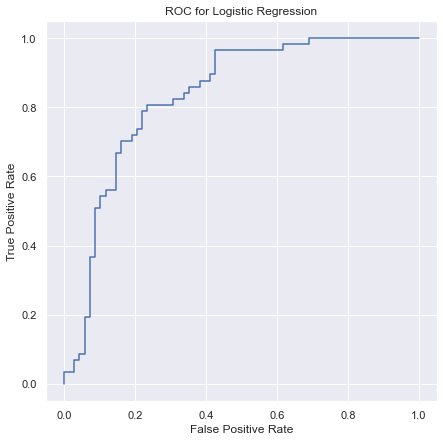

In [72]:
# Making ROC curve for Logistic Regression

y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for Logistic Regression')
plt.show()

# KNN

In [73]:
#Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 3)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, p=3)

In [74]:
#Prediction
Y_pred_knn = knn_classifier.predict(X_test)
features = np.array([[0,78,0,0,1,3,0,60,28.8,1]])
# using inputs to predict the output
prediction = knn_classifier.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [1]


In [105]:
knn_acc = accuracy_score(Y_test, Y_pred_knn)
print('Accuracy:', knn_acc)
print('Precision',precision_score(Y_test,Y_pred_knn))
print('Recall',recall_score(Y_test,Y_pred_knn))
print('F1 score',f1_score(Y_test,Y_pred_knn))
print('ROC score',roc_auc_score(Y_test,Y_pred_knn))

Accuracy: 0.712
Precision 0.6521739130434783
Recall 0.7894736842105263
F1 score 0.7142857142857143
ROC score 0.7182662538699689


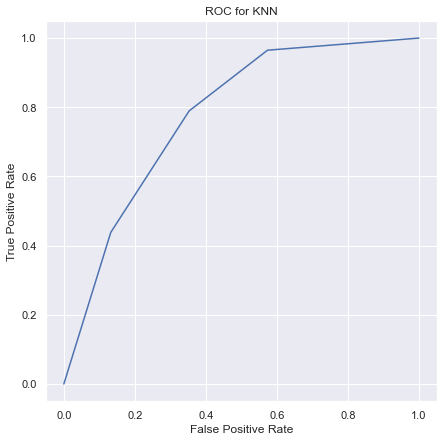

In [76]:
# Making ROC curve for KNN
y_pred_proba = knn_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for KNN')
plt.show()

# Decision Tree

In [77]:
from sklearn import tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [78]:
#Prediction
Y_pred_dtc = dt_classifier.predict(X_test)
features = np.array([[0,78,0,0,1,3,0,60,28.8,1]])
# using inputs to predict the output
prediction = dt_classifier.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [1]


In [106]:
dt_acc = accuracy_score(Y_test, Y_pred_dtc)
print('Accuracy:', dt_acc)
print('Precision',precision_score(Y_test,Y_pred_dtc))
print('Recall',recall_score(Y_test,Y_pred_dtc))
print('F1 score',f1_score(Y_test,Y_pred_dtc))
print('ROC score',roc_auc_score(Y_test,Y_pred_dtc))

Accuracy: 0.704
Precision 0.6724137931034483
Recall 0.6842105263157895
F1 score 0.6782608695652174
ROC score 0.7023993808049536


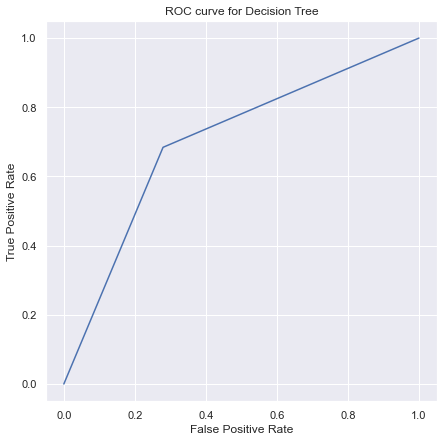

In [80]:
# Making ROC curve for Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
#building model
dstree = DecisionTreeClassifier()
dstree.fit(X_train, Y_train)
#predicting probabilities
dtree_prob = [0 for _ in range(len(Y_test))]
dstree = dstree.predict_proba(X_test)
dstree_prob = dt_classifier.predict_proba(X_test)
dstree_prob=dstree_prob[:,1]
#calculate roc score
dtree_auc = roc_auc_score (Y_test, dtree_prob)
#plotting
fpr, tpr, _ = roc_curve(Y_test, dstree_prob)
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for Decision Tree')
plt.show()

# Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()

In [82]:
gnb_classifier.fit(X_train, Y_train) 
Y_pred_gnb = gnb_classifier.predict(X_test) 
features = np.array([[0,78,0,0,1,3,0,60,28.8,1]])
# using inputs to predict the output
prediction = gnb_classifier.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [1]


In [108]:
gnb_acc = accuracy_score(Y_test, Y_pred_gnb)
print('Accuracy:', gnb_acc)
print('Precision',precision_score(Y_test,Y_pred_gnb))
print('Recall',recall_score(Y_test,Y_pred_gnb))
print('F1 score',f1_score(Y_test,Y_pred_gnb))
print('ROC score',roc_auc_score(Y_test,Y_pred_gnb))

Accuracy: 0.712
Precision 0.6521739130434783
Recall 0.7894736842105263
F1 score 0.7142857142857143
ROC score 0.7182662538699689


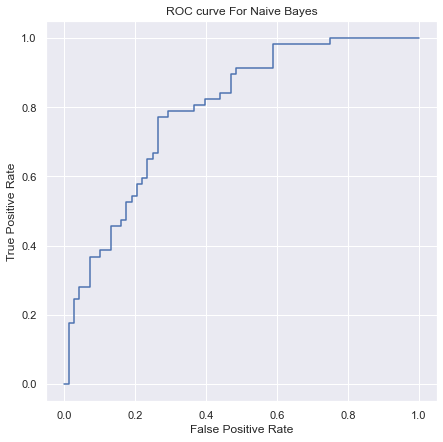

In [84]:
# Making ROC curve for Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
#building model
nb = GaussianNB(var_smoothing=.15)
nb.fit(X_train, Y_train)
#predicting probabilities
n_prob = [0 for _ in range(len(Y_test))]
nb = nb.predict_proba(X_test)
nb_prob = gnb_classifier.predict_proba(X_test)
nb_prob=nb_prob[:,1]
#calculate roc score
n_auc = roc_auc_score (Y_test, n_prob)
#plotting
fpr, tpr, _ = roc_curve(Y_test, nb_prob)
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve For Naive Bayes')
plt.show()

# Support Vector Machine

In [85]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)

SVC()

In [86]:
Y_pred_svm = svm_classifier.predict(X_test)
features = np.array([[0,78,0,0,1,3,0,60,28.8,1]])
# using inputs to predict the output
prediction = svm_classifier.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [1]


In [109]:
svm_acc = accuracy_score(Y_test, Y_pred_svm)
print('Accuracy:', svm_acc)
print('Precision',precision_score(Y_test,Y_pred_svm))
print('Recall',recall_score(Y_test,Y_pred_svm))
print('F1 score',f1_score(Y_test,Y_pred_svm))
print('ROC score',roc_auc_score(Y_test,Y_pred_svm))

Accuracy: 0.776
Precision 0.6986301369863014
Recall 0.8947368421052632
F1 score 0.7846153846153846
ROC score 0.7856037151702787


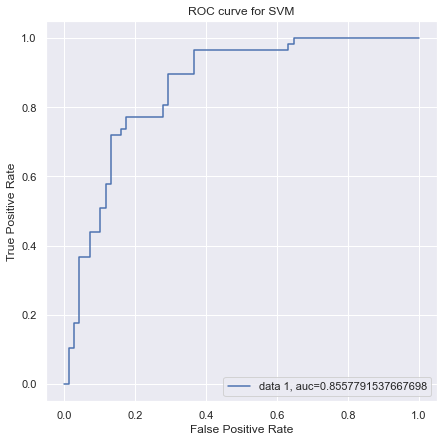

In [88]:
# Making ROC curve for SVM

clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.figure(figsize=(7, 7))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for SVM')
plt.show()

# Model Comparison

In [104]:
names = ["Logistic Regression", "KNN", "Decision Tree",
         "Naive Bayes","SVM"]
classifiers = [
   LogisticRegression(),
   KNeighborsClassifier(n_neighbors = 3),
   DecisionTreeClassifier(),
   GaussianNB(),
   SVC()
]
model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0
for names, clf in zip(names, classifiers):
    clf.fit(X_train,Y_train)
    df.loc[index,'Classifiers'] = names
    df.loc[index,'Accuracy'] = clf.score(X_train,Y_train)
    df.loc[index,'Precision'] = precision_score(Y_test,clf.predict(X_test))
    df.loc[index,'Recall'] = recall_score(Y_test,clf.predict(X_test))
    df.loc[index,'F1 Score'] = f1_score(Y_test,clf.predict(X_test))
    df.loc[index,'ROC'] = roc_auc_score(Y_test,clf.predict(X_test))
    index+=1

In [110]:
Accuracy_Data={'Models':['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree','Support Vector Machine','Navie Bayes'],
      'Accuracy':[lr_acc,knn_acc,dt_acc,svm_acc,gnb_acc]}

Accuracy_Data =pd.DataFrame(Accuracy_Data)
Accuracy_Data.sort_values('Accuracy', ascending=False)

,Models,Accuracy
3,Support Vector Machine,0.776
0,Logistic Regression,0.744
1,K-Nearest Neighbor,0.712
4,Navie Bayes,0.712
2,Decision Tree,0.704


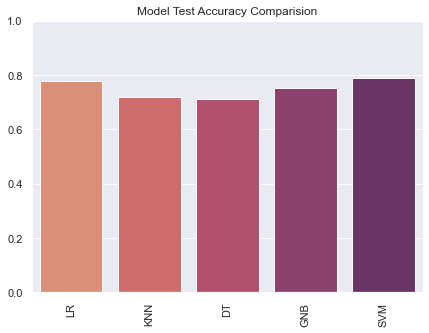

In [90]:
Models = ['LR', 'KNN', 'DT', 'GNB', 'SVM']
Accuracies = [0.776, 0.72, 0.71, 0.75, 0.79]
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(Models, Accuracies, palette='flare')
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparision')
ymin, ymax = 0,1
plt.ylim(ymin, ymax)
plt.show()

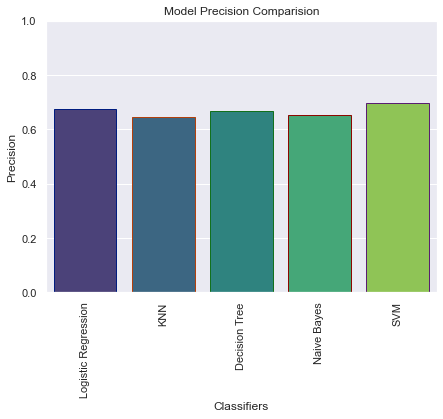

In [91]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Classifiers',y='Precision', data=df, palette='viridis',
           edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Precision Comparision')
ymin, ymax = 0,1
plt.ylim(ymin, ymax)
plt.show()

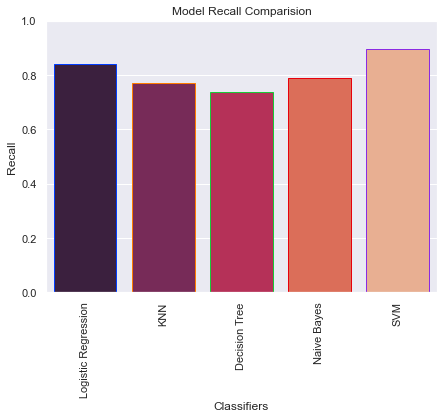

In [92]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Classifiers',y='Recall', data=df, palette='rocket',
           edgecolor=sns.color_palette('bright'))
plt.xticks(rotation=90)
plt.title('Model Recall Comparision')
ymin, ymax = 0,1
plt.ylim(ymin, ymax)
plt.show()

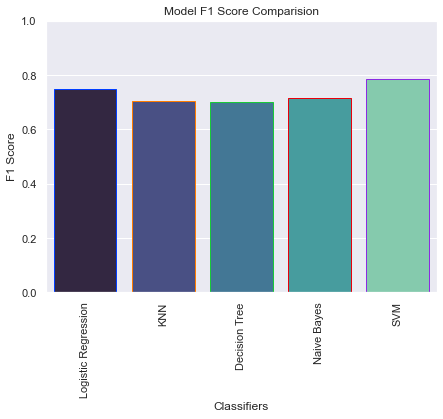

In [93]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Classifiers',y='F1 Score', data=df, palette='mako',
           edgecolor=sns.color_palette('bright'))
plt.xticks(rotation=90)
plt.title('Model F1 Score Comparision')
ymin, ymax = 0,1
plt.ylim(ymin, ymax)
plt.show()

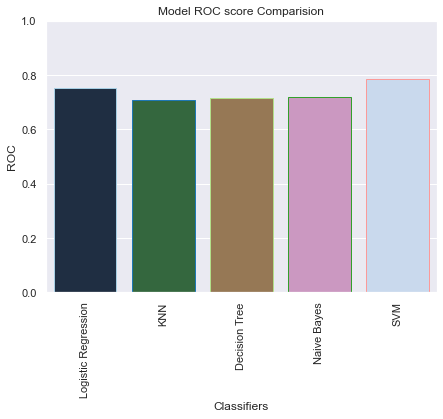

In [94]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Classifiers',y='ROC', data=df, palette='cubehelix',
           edgecolor=sns.color_palette("Paired"))
plt.xticks(rotation=90)
plt.title('Model ROC score Comparision')
ymin, ymax = 0,1
plt.ylim(ymin, ymax)
plt.show()

# PICKLING

In [95]:
# Pickling for Logistic Regression
pickle.dump(lr, open('stroke_logistic_model.pkl','wb'))

In [96]:
# Pickling SVM Model
pickle.dump(svm_classifier, open('stroke_svm_model.pkl','wb'))

In [97]:
# Pickling KNN Model
pickle.dump(knn_classifier, open('stroke_knn_model.pkl','wb'))

In [98]:
# Pickling GNB Model
pickle.dump(gnb_classifier, open('stroke_gnb_model.pkl','wb'))

In [99]:
# Pickling Decision Tree Model
pickle.dump(dt_classifier, open('stroke_dt_model.pkl','wb'))

# Pickle Loading

### Logistic Regression

In [100]:
model = pickle.load(open('stroke_logistic_model.pkl','rb'))
print(model.predict([[1,67,0,1,1,2,1,228,36,1]]))

[1]


In [101]:
model = pickle.load(open('stroke_logistic_model.pkl','rb'))
print(model.predict([[0,34,0,0,1,0,0,86,32,3]]))

[0]


### SVM

In [102]:
model = pickle.load(open('stroke_svm_model.pkl','rb'))
print(model.predict([[1,67,0,1,1,2,1,228,36,1]]))

[1]


In [103]:
model = pickle.load(open('stroke_svm_model.pkl','rb'))
print(model.predict([[0,34,0,0,1,0,0,86,32,3]]))

[0]
